# Worst Case

Inputs péssimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") muito ruins, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") baixas.

## Inputs

### Imports

In [70]:
import os
import pandas as pd
import numpy as np

### Parameters

In [71]:
num_samples = 70 # quantidade de exemplos

### Worst Inputs

In [72]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas ruins para edge inputs
    # Forçar pelo menos 2 métricas ruins por amostra
    
    # RSSI: sempre baixo (sinal fraco)
    rssi = np.random.uniform(-90, -60)  
    
    # ETX: tendência para alto (mais retransmissões)
    etx = np.random.uniform(4, 10)
    
    # Delay: tendência para alto
    delay = np.random.uniform(30, 100)
    
    # Busy fraction: tendência para alto (canal ocupado)
    busy_fraction = np.random.uniform(0.3, 1.0)
    
    # Adicionar algumas variações extremas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-95, -85)  # RSSI muito baixo
        if np.random.random() < 0.5:
            etx = np.random.uniform(7, 10)      # ETX muito alto
        if np.random.random() < 0.5:
            delay = np.random.uniform(70, 100)  # Delay muito alto
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0.8, 1.0)  # Canal muito ocupado
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [73]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas ruins para radnet
    # Cenários de alta mobilidade, muitos pares, rede congestionada
    
    # APMR: tendência baixa (prefixes ineficientes)
    apmr_edge = np.random.uniform(0.45, 0.65)
    
    # MFSR: tendência baixa (baixa taxa de sucesso)
    mfsr_edge = np.random.uniform(0.50, 0.70)
    
    # IDG: tendência baixa (entrega difícil em grupo)
    idg_global = np.random.uniform(0.45, 0.65)
    
    # Adicionar casos extremamente ruins
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.45, 0.55)  # APMR muito baixo
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.50, 0.60)  # MFSR muito baixo
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.45, 0.55)  # IDG muito baixo
    
    # Garantir ranges válidos
    apmr_edge = max(0.45, min(0.70, apmr_edge))
    mfsr_edge = max(0.50, min(0.75, mfsr_edge))
    idg_global = max(0.45, min(0.70, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [74]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [75]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [76]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [77]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.7029     0.4101       0.6678    
10       0.3777     0.9682       0.9720    
20       0.1351     0.9806       0.9817    
30       0.0664     0.9821       0.9823    
40       0.0513     0.9829       0.9833    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [78]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-88    5.2   84     0.40   0        Ruim     1.00      
-76    9.8   44     0.33   0        Ruim     1.00      
-80    9.2   37     0.66   0        Ruim     1.00      
-81    7.2   41     0.80   0        Ruim     1.00      
-72    6.8   71     0.82   0        Ruim     1.00      
-74    8.0   54     0.60   0        Ruim     1.00      
-62    8.5   30     0.66   0        Ruim     1.00      
-65    9.1   87     0.80   0        Ruim     1.00      
-60    4.2   80     0.95   0        Ruim     1.00      
-71    7.0   38     0.74   0        Ruim     1.00      
-88    7.7   83     0.81   0        Ruim     1.00      
-88    9.7   37     0.45   0        Ruim     1.00      
-87    7.1   78     0.66   0        Ruim     1.00      
-75    7.4   86     0.45   0        Ruim     1.00      
-69    5.8   62     0.78   0        Ruim     1.00      
-88    5.7   64     0.84   0        Ruim     1.0

## Fusion

In [79]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-88    5.2   84     0.40   0.59   0.57   0.46   0        Ruim     0.66      
-76    9.8   44     0.33   0.52   0.66   0.59   0        Ruim     0.64      
-80    9.2   37     0.66   0.51   0.56   0.53   0        Ruim     0.68      
-81    7.2   41     0.80   0.61   0.57   0.57   0        Ruim     0.65      
-72    6.8   71     0.82   0.51   0.67   0.58   0        Ruim     0.65      
-74    8.0   54     0.60   0.59   0.53   0.54   0        Ruim     0.67      
-62    8.5   30     0.66   0.58   0.54   0.58   0        Ruim     0.66      
-65    9.1   87     0.80   0.63   0.63   0.50   0        Ruim     0.64      
-60    4.2   80     0.95   0.50   0.63   0.48   0        Ruim     0.67      
-71    7.0   38     0.74   0.48   0.57   0.62   0        Ruim     0.67      
-88    7.7   83     0.81   0.50   0.51   0.55   0        Ruim     0.69      
-88  

## Kalman

In [80]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-88    5.2   84     0.40   0.59   0.57   0.46   0        Ruim     0.66      
-76    9.8   44     0.33   0.52   0.66   0.59   0        Ruim     0.65      
-80    9.2   37     0.66   0.51   0.56   0.53   0        Ruim     0.66      
-81    7.2   41     0.80   0.61   0.57   0.57   0        Ruim     0.66      
-72    6.8   71     0.82   0.51   0.67   0.58   0        Ruim     0.65      
-74    8.0   54     0.60   0.59   0.53   0.54   0        Ruim     0.66      
-62    8.5   30     0.66   0.58   0.54   0.58   0        Ruim     0.66      
-65    9.1   87     0.80   0.63   0.63   0.50   0        Ruim     0.65      
-60    4.2   80     0.95   0.50   0.63   0.48   0        Ruim     0.66      
-71    7.0   38     0.74   0.48   0.57   0.62   0        Ruim     0.66      
-88    7.7   83     0.81   0.50   0.51   0.55   0        Ruim     0.66      


## Results

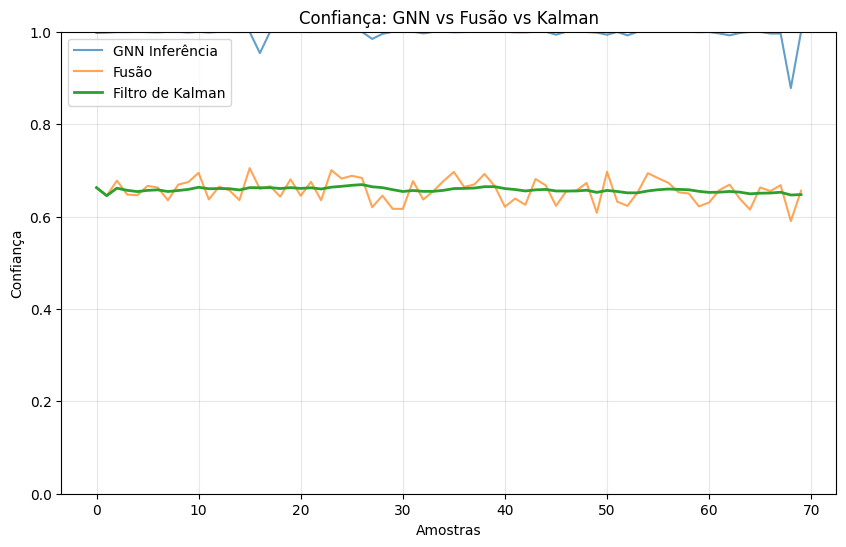

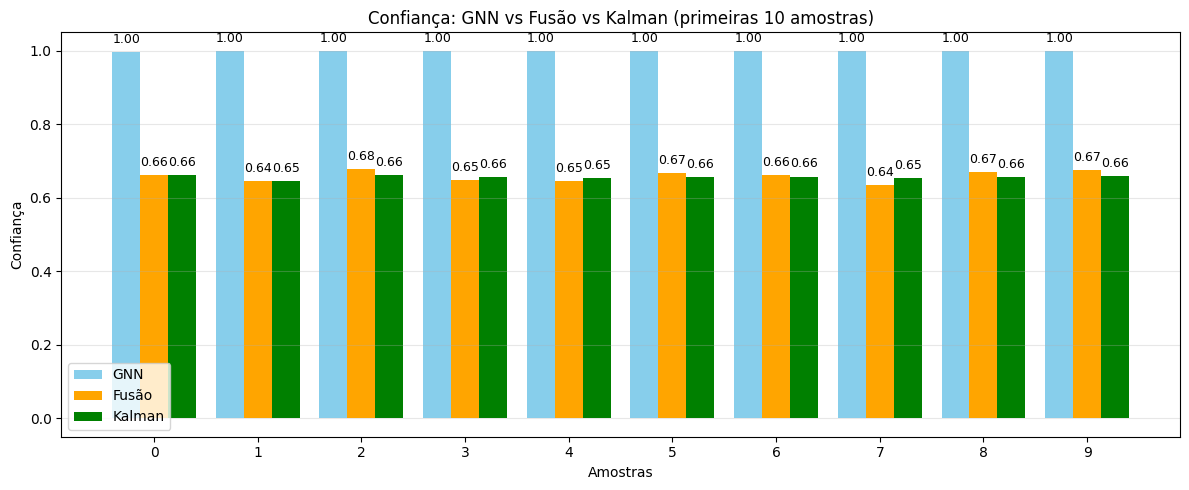

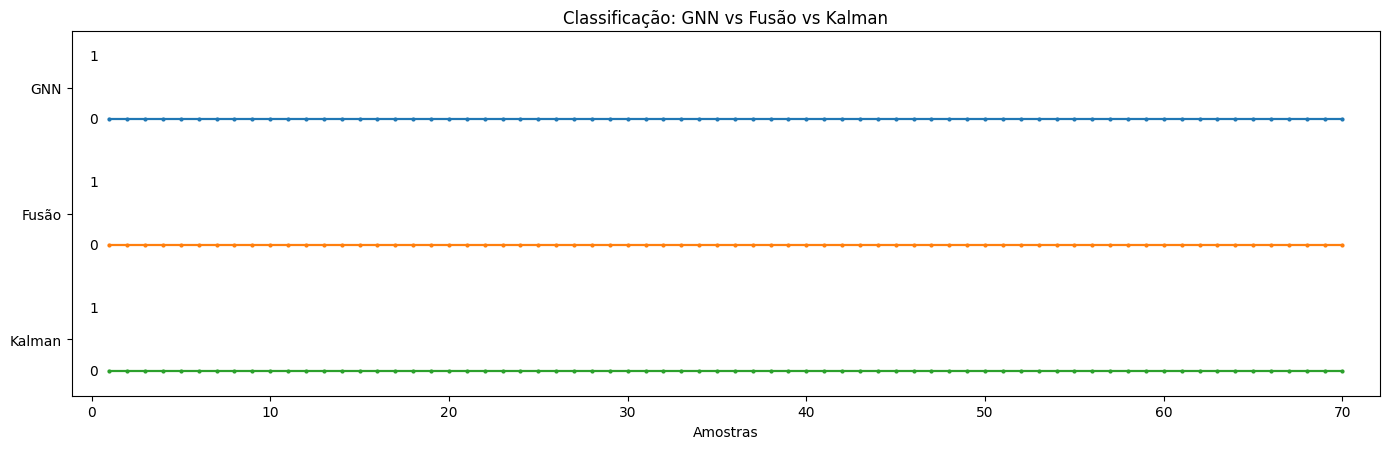

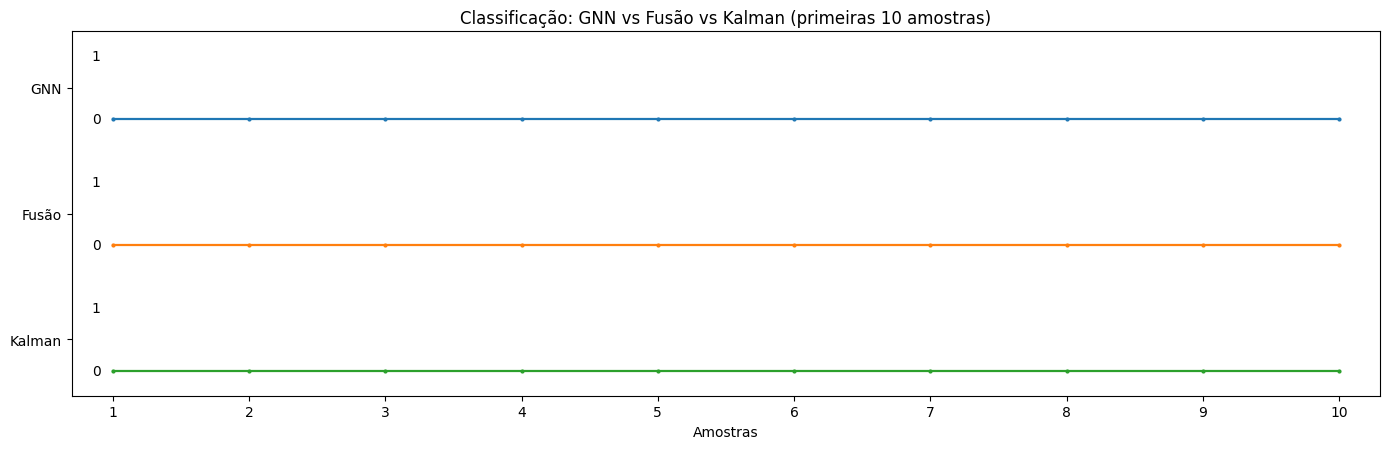

In [81]:
%run 7.results.ipynb

# Best Case

Inputs ótimos, métricas da rede ("rssi", "etx", "delay", "busy_fraction") quase perfeitas, e estatísticas do RADNET ("apmr_edge", "mfsr_edge", "idg_global") altas.

## Inputs

### Imports

In [82]:
import os
import pandas as pd
import numpy as np

### Parameters

In [83]:
num_samples = 70 # quantidade de exemplos

### Best Inputs

In [84]:
edge_inputs = []

while len(edge_inputs) < num_samples:
    # Gerar sempre métricas boas para edge inputs
    
    # RSSI: sempre alto (sinal forte)
    rssi = np.random.uniform(-65, -30)  
    
    # ETX: tendência para baixo (poucas retransmissões)
    etx = np.random.uniform(1, 4)
    
    # Delay: tendência para baixo
    delay = np.random.uniform(1, 40)
    
    # Busy fraction: tendência para baixo (canal livre)
    busy_fraction = np.random.uniform(0, 0.4)
    
    # Adicionar algumas variações extremas boas
    extreme_factor = 0.3
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            rssi = np.random.uniform(-45, -30)  # RSSI muito alto
        if np.random.random() < 0.5:
            etx = np.random.uniform(1, 2)       # ETX muito baixo
        if np.random.random() < 0.5:
            delay = np.random.uniform(1, 20)    # Delay muito baixo
        if np.random.random() < 0.5:
            busy_fraction = np.random.uniform(0, 0.2)  # Canal muito livre
    
    # Arredondar valores
    rssi = round(rssi, 1)
    etx = round(etx, 1)
    delay = round(delay)
    busy_fraction = round(busy_fraction, 2)
    
    edge_inputs.append([rssi, etx, delay, busy_fraction])

In [85]:
radnet_inputs = []

while len(radnet_inputs) < num_samples:
    # Gerar sempre métricas boas para radnet
    # Cenários de baixa mobilidade, poucos pares, rede estável
    
    # APMR: tendência alta (prefixes eficientes)
    apmr_edge = np.random.uniform(0.75, 0.95)
    
    # MFSR: tendência alta (alta taxa de sucesso)
    mfsr_edge = np.random.uniform(0.80, 0.95)
    
    # IDG: tendência alta (entrega eficiente em grupo)
    idg_global = np.random.uniform(0.70, 0.90)
    
    # Adicionar casos extremamente bons
    extreme_factor = 0.25
    if np.random.random() < extreme_factor:
        if np.random.random() < 0.5:
            apmr_edge = np.random.uniform(0.85, 0.95)  # APMR muito alto
        if np.random.random() < 0.5:
            mfsr_edge = np.random.uniform(0.88, 0.95)  # MFSR muito alto
        if np.random.random() < 0.5:
            idg_global = np.random.uniform(0.80, 0.90)  # IDG muito alto
    
    # Garantir ranges válidos
    apmr_edge = max(0.70, min(0.98, apmr_edge))
    mfsr_edge = max(0.75, min(0.98, mfsr_edge))
    idg_global = max(0.65, min(0.95, idg_global))
    
    # Arredondar valores
    apmr_edge = round(apmr_edge, 6)
    mfsr_edge = round(mfsr_edge, 6)
    idg_global = round(idg_global, 2)
    
    radnet_inputs.append([apmr_edge, mfsr_edge, idg_global])

### Save

In [86]:
edges_input = pd.DataFrame(edge_inputs, columns=["rssi", "etx", "delay", "busy_fraction"])
os.makedirs("../inputs", exist_ok=True)
edges_input.to_csv("../inputs/edges_input.csv", index=False)

print("Edges Inputs salvo em ../datasets/edges_input.csv")

Edges Inputs salvo em ../datasets/edges_input.csv


In [87]:
radnet_input = pd.DataFrame(radnet_inputs, columns=["apmr_edge", "mfsr_edge", "idg_global"])
os.makedirs("../inputs", exist_ok=True)
radnet_input.to_csv("../inputs/radnet_input.csv", index=False)

print("Radnet Input salvo em ../datasets/radnet_input.csv")

Radnet Input salvo em ../datasets/radnet_input.csv


## Dataset

In [88]:
%run 2.dataset.ipynb

Dataset salvo em ../datasets/edges_dataset.csv


## Train

In [89]:
%run 3.train.ipynb

Epoch    Loss       Train Acc    Test Acc  
------------------------------------------
0        0.6812     0.6022       0.6963    
10       0.3389     0.9353       0.9399    
20       0.1509     0.9582       0.9604    
30       0.0894     0.9701       0.9716    
40       0.0671     0.9764       0.9773    
Modelo salvo em ../models/gnn_model.pth
Modelo salvo em ../models/scaler_model.pkl


## Inference

In [90]:
%run 4.inference.ipynb

RSSI   ETX   Delay  Busy   Classe   Status   Confiança 
-------------------------------------------------------
-40    2.0   13     0.14   1        Bom      1.00      
-41    1.9   18     0.02   1        Bom      1.00      
-57    3.8   17     0.31   1        Bom      0.96      
-53    2.1   4      0.15   1        Bom      1.00      
-40    3.4   5      0.21   1        Bom      1.00      
-32    2.0   29     0.28   1        Bom      0.99      
-32    1.7   15     0.01   1        Bom      1.00      
-60    1.5   36     0.38   1        Bom      0.90      
-40    3.0   18     0.16   1        Bom      1.00      
-54    1.3   7      0.28   1        Bom      1.00      
-53    3.4   25     0.14   1        Bom      0.99      
-31    3.6   26     0.36   1        Bom      0.97      
-51    3.8   6      0.01   1        Bom      1.00      
-43    1.6   16     0.05   1        Bom      1.00      
-53    3.4   38     0.23   1        Bom      0.93      
-31    3.9   32     0.22   1        Bom      0.9

## Fusion

In [91]:
%run 5.fusion.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
----------------------------------------------------------------------
-40    2.0   13     0.14   0.77   0.95   0.90   1        Bom      0.92      
-41    1.9   18     0.02   0.79   0.88   0.72   1        Bom      0.89      
-57    3.8   17     0.31   0.84   0.82   0.74   1        Bom      0.87      
-53    2.1   4      0.15   0.83   0.94   0.76   1        Bom      0.92      
-40    3.4   5      0.21   0.91   0.88   0.84   1        Bom      0.93      
-32    2.0   29     0.28   0.87   0.82   0.85   1        Bom      0.90      
-32    1.7   15     0.01   0.93   0.91   0.71   1        Bom      0.93      
-60    1.5   36     0.38   0.90   0.86   0.81   1        Bom      0.88      
-40    3.0   18     0.16   0.94   0.81   0.74   1        Bom      0.91      
-54    1.3   7      0.28   0.80   0.85   0.72   1        Bom      0.89      
-53    3.4   25     0.14   0.85   0.92   0.71   1        Bom      0.91      
-31  

## Kalman

In [92]:
%run 6.kalman.ipynb

RSSI   ETX   Delay  Busy   APMR   MFSR   IDG    Classe   Status   Confiança 
---------------------------------------------------------------------------
-40    2.0   13     0.14   0.77   0.95   0.90   1        Bom      0.92      
-41    1.9   18     0.02   0.79   0.88   0.72   1        Bom      0.89      
-57    3.8   17     0.31   0.84   0.82   0.74   1        Bom      0.88      
-53    2.1   4      0.15   0.83   0.94   0.76   1        Bom      0.89      
-40    3.4   5      0.21   0.91   0.88   0.84   1        Bom      0.90      
-32    2.0   29     0.28   0.87   0.82   0.85   1        Bom      0.90      
-32    1.7   15     0.01   0.93   0.91   0.71   1        Bom      0.91      
-60    1.5   36     0.38   0.90   0.86   0.81   1        Bom      0.90      
-40    3.0   18     0.16   0.94   0.81   0.74   1        Bom      0.90      
-54    1.3   7      0.28   0.80   0.85   0.72   1        Bom      0.90      
-53    3.4   25     0.14   0.85   0.92   0.71   1        Bom      0.90      


## Resuts

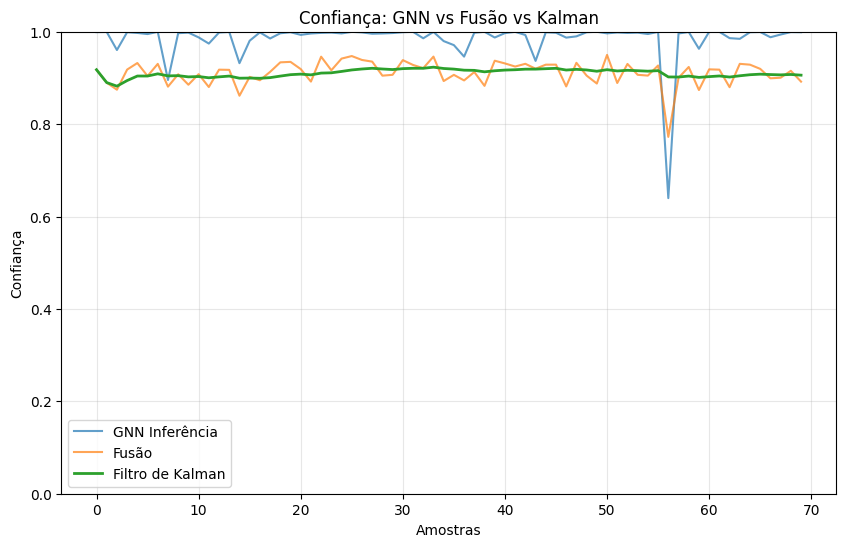

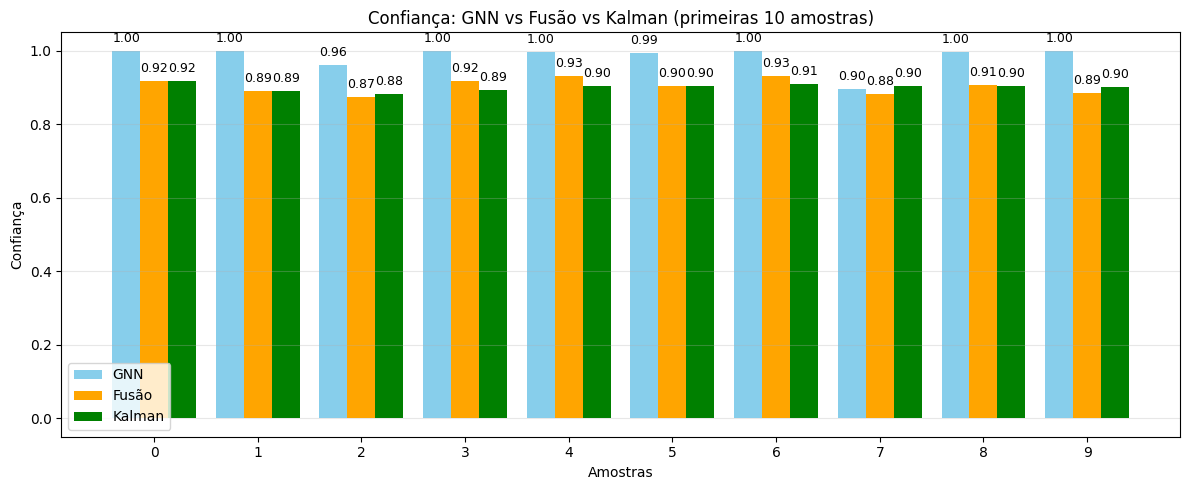

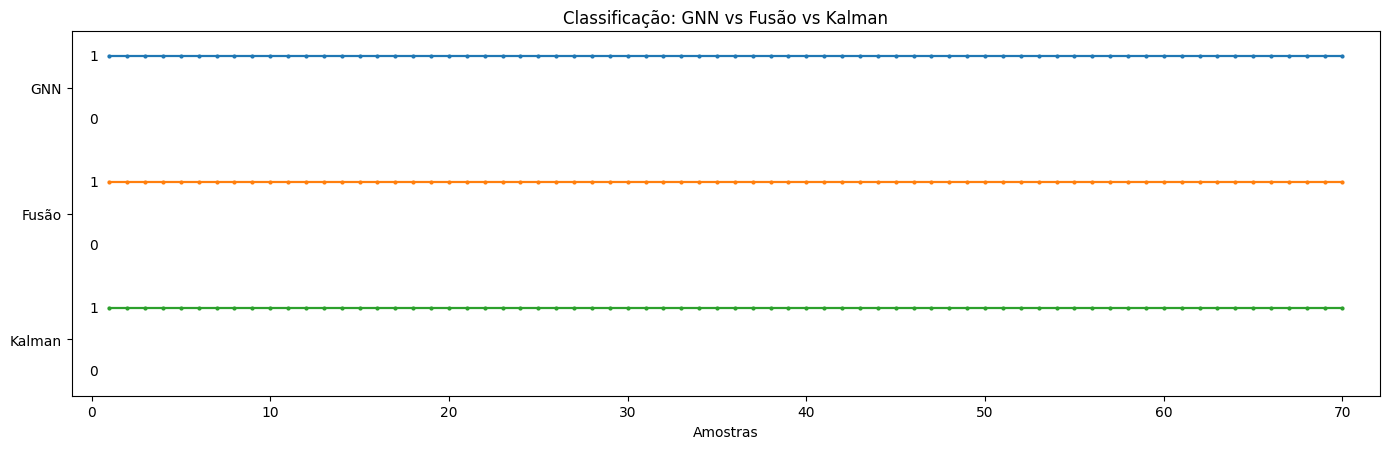

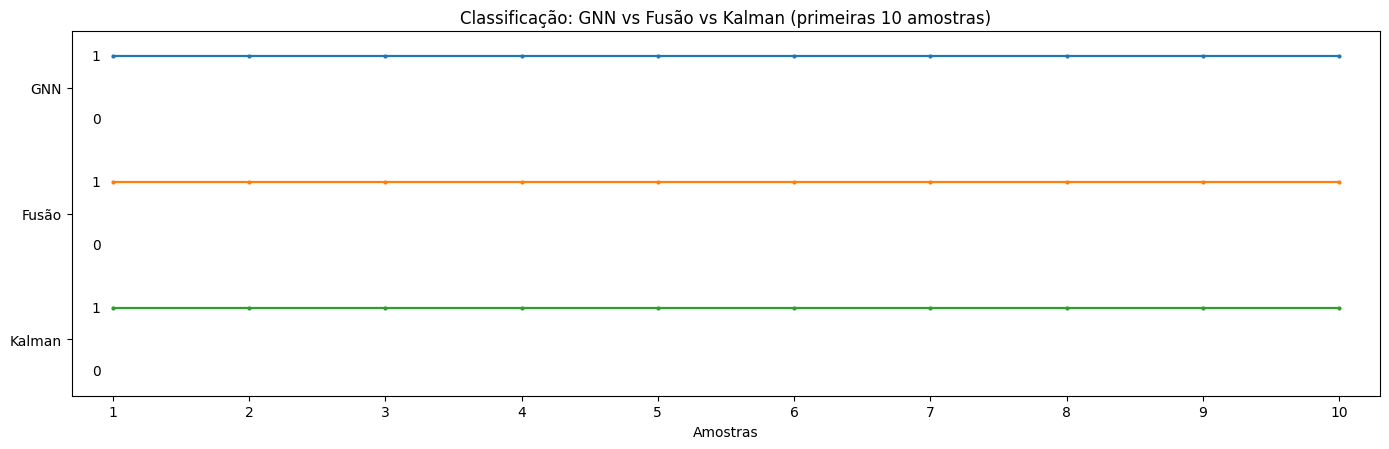

In [93]:
%run 7.results.ipynb